In [5]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [6]:
# Ensure that the LHC and SPS rows correspond in terms of timestamps and intensity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Required by Jupyter for inlining images
%matplotlib inline

In [7]:
lhc_b1 = np.loadtxt("../Data/LHC_intensity_B1.txt")
lhc_b2 = np.loadtxt("../Data/LHC_intensity_B2.txt")

sps_b1 = np.loadtxt("../Data/SPS_intensity_B1.txt")
sps_b2 = np.loadtxt("../Data/SPS_intensity_B2.txt")

print(len(lhc_b1[:,0]))
print(len(sps_b1[:,0]))

18977
1624


In [8]:
# Calculate difference between every 10th LHC timestamp and SPS
count_sps = 0
time_stamp = []
time_differences = []
sps_reading = []
lhc_reading = []

for i in range(5, len(lhc_b1[:,0]), 10):
    #calculate time difference
	diff = lhc_b1[i,0] - sps_b1[count_sps,0]
    #if difference is not between 14 and 20, then the spike was not for the LHC
    #or an error in the LS, so skip it
	if diff < 14 or diff > 20:
		continue
    #append readings to list
	time_stamp.append(lhc_b1[i,0])
	time_differences.append(diff)
	sps_reading.append(sps_b1[count_sps,1])
	lhc_reading.append(lhc_b1[i+4,1]-lhc_b1[i-4,1])
    #increment the sps pointer
	count_sps += 1

#build the dataframe:
data = {'Time Stamp':time_stamp,'Time Differences':time_differences,'SPS Reading':sps_reading,'LHC Reading':lhc_reading}
Beam1_df = pd.DataFrame(data=data)
Beam1_df.head()

,Time Stamp,Time Differences,SPS Reading,LHC Reading
0,1.534476e+09,17.874,1.282752e+12,1.281810e+12
1,1.534476e+09,18.281,1.035162e+13,1.035063e+13
2,1.534476e+09,17.501,1.292184e+12,1.293680e+12
3,1.534476e+09,17.512,1.544490e+13,1.546251e+13
4,1.534477e+09,18.326,1.273320e+12,1.272050e+12


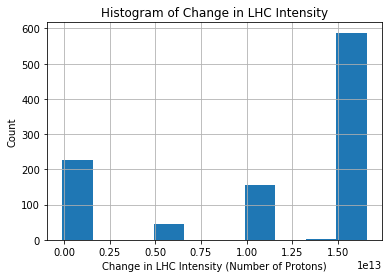

In [11]:
cond = Beam1_df['LHC Reading']>-1e14

plt.figure()
Beam1_df[cond]['LHC Reading'].hist()
plt.title('Histogram of Change in LHC Intensity')
plt.xlabel('Change in LHC Intensity (Number of Protons)')
plt.ylabel('Count')
plt.savefig('../Dissertation/images/Histogram_of_Change_in_LHC_Intensity')

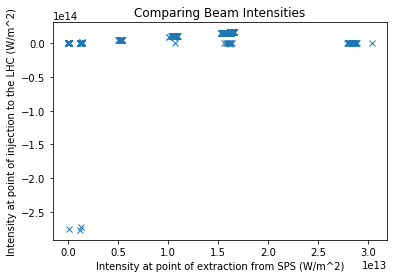

In [5]:
#plot the correlations
plt.plot(Beam1_df['SPS Reading'],Beam1_df['LHC Reading'],'x')
plt.xlabel('Intensity at point of extraction from SPS (W/m^2)')
plt.ylabel('Intensity at point of injection to the LHC (W/m^2)')
plt.title('Comparing Beam Intensities')
#Note I took of the negative LHC Readings, what do these mean??
#plt.xlim(0,1e11)#max(Beam1_df['LHC Reading']))
#plt.ylim(0,1e11)
plt.show()

In [6]:
#Similar to above but for beam 2
count_sps = 0
time_stamp = []
time_differences = []
sps_reading = []
lhc_reading = []

for i in range(5, len(lhc_b2[:,0]), 10):
    #calculate time difference
	diff = lhc_b2[i,0] - sps_b2[count_sps,0]
    #if difference is not between 14 and 20, then the spike was not for the LHC
    #or an error in the LS, so skip it    
	if diff < 14 or diff > 20:
		continue
    #append readings to list
	time_stamp.append(lhc_b2[i,0])
	time_differences.append(diff)
	sps_reading.append(sps_b2[count_sps,1])
	lhc_reading.append(lhc_b2[i+4,1]-lhc_b2[i-4,1])
    #incerement the sps pointer
	count_sps += 1

#build the dataframe:
data = {'Time Stamp': time_stamp,'Time Differences':time_differences,'SPS Reading':sps_reading,'LHC Reading':lhc_reading}
Beam2_df = pd.DataFrame(data=data)
Beam2_df.head()

,Time Stamp,Time Differences,SPS Reading,LHC Reading
0,1.534476e+09,17.677,1.282752e+12,1.283170e+12
1,1.534476e+09,18.084,1.036105e+13,1.034522e+13
2,1.534476e+09,18.106,1.263888e+12,1.282510e+12
3,1.534476e+09,18.315,1.263888e+12,1.267990e+12
4,1.534477e+09,17.919,1.230876e+12,1.240670e+12


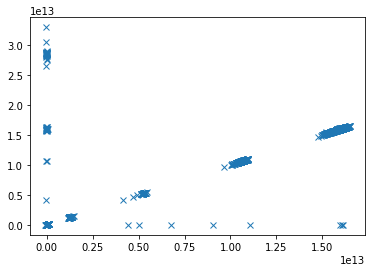

In [21]:
#plot the correlations
plt.plot(Beam2_df['LHC Reading'],Beam2_df['SPS Reading'],'x')
#How can we have an LHC reading with no SPS reading??
#plt.xlim(0,max(Beam2_df['LHC Reading']))
plt.show()

In [7]:
#save the dataframes
Beam1_df.to_pickle('../Data/Beam1_SPSandLHC.pkl')
Beam2_df.to_pickle('../Data/Beam2_SPSandLHC.pkl')